In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/brisbane water quality.zip')
data.shape

(30894, 20)

In [4]:
data.columns

Index(['Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll', 'Chlorophyll [quality]',
       'Temperature', 'Temperature [quality]', 'Dissolved Oxygen',
       'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation)',
       'Dissolved Oxygen (%Saturation) [quality]', 'pH', 'pH [quality]',
       'Salinity', 'Salinity [quality]', 'Specific Conductance',
       'Specific Conductance [quality]', 'Turbidity', 'Turbidity [quality]'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

In [6]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [7]:
data.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


In [8]:
#Missing Value
missing_val=data.isnull().sum()

In [9]:
missing_val

,0
Timestamp,0
Record number,0
Average Water Speed,20
Average Water Direction,1
Chlorophyll,585
Chlorophyll [quality],808
Temperature,5164
Temperature [quality],5344
Dissolved Oxygen,4300
Dissolved Oxygen [quality],4524


In [10]:
data.drop(["Chlorophyll [quality]","Temperature [quality]","Dissolved Oxygen [quality]","Dissolved Oxygen (%Saturation) [quality]","pH [quality]","Salinity [quality]","Specific Conductance [quality]","Turbidity [quality]"],inplace=True,axis=1)

In [11]:
data.set_index('Timestamp', inplace=True)

In [12]:
#naive fillna by mean
naive_data=data.fillna(data.mean())

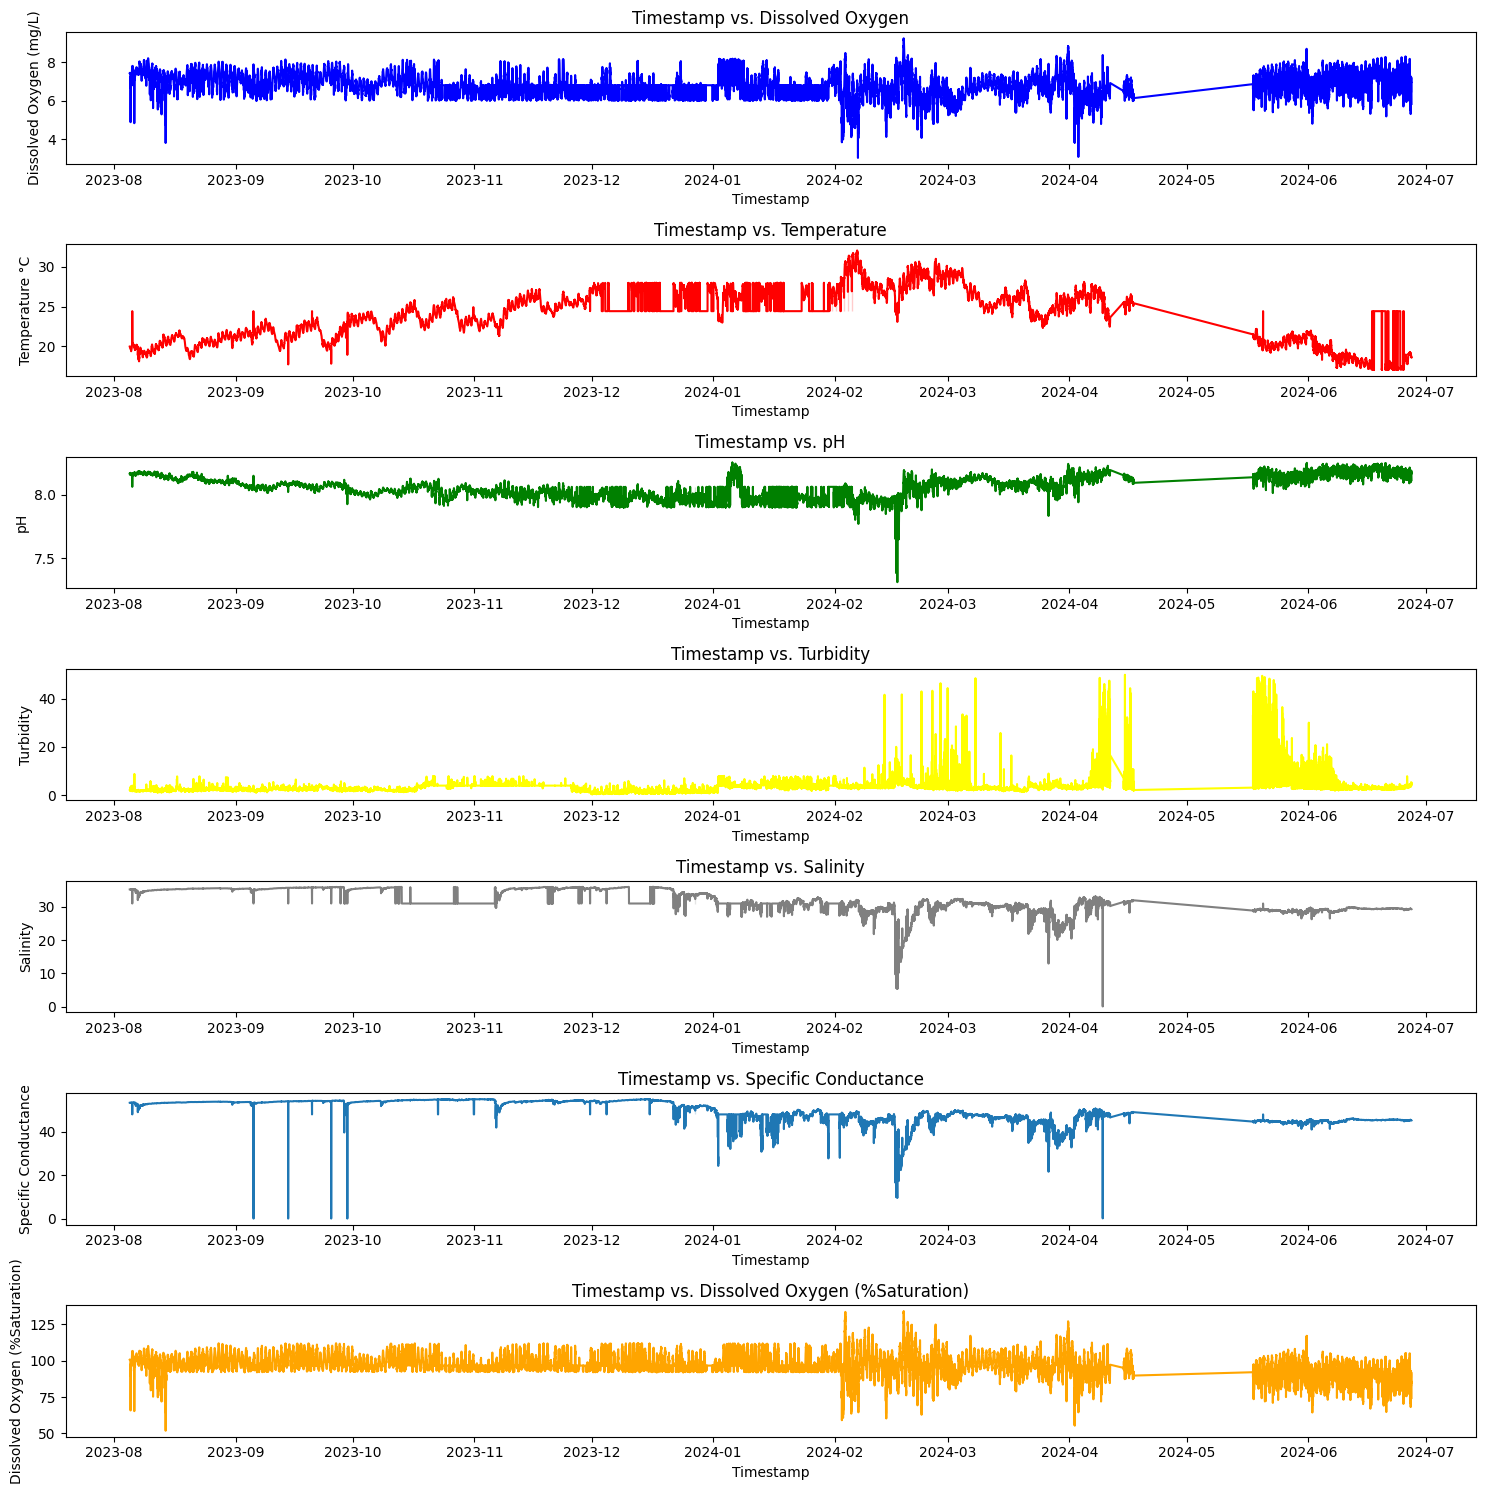

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(7,1,figsize=(15,15))


sns.lineplot(data=naive_data, x='Timestamp', y='Dissolved Oxygen', ax=axes[0],color='blue')
axes[0].set_title('Timestamp vs. Dissolved Oxygen')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Dissolved Oxygen (mg/L)')


sns.lineplot(data=naive_data, x='Timestamp', y='Temperature', ax=axes[1],color='red')
axes[1].set_title('Timestamp vs. Temperature')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Temperature °C')

sns.lineplot(data=naive_data, x='Timestamp', y='pH', ax=axes[2],color='green')
axes[2].set_title('Timestamp vs. pH')
axes[2].set_xlabel('Timestamp')
axes[2].set_ylabel('pH')


sns.lineplot(data=naive_data, x='Timestamp', y='Turbidity', ax=axes[3],color='yellow')
axes[3].set_title('Timestamp vs. Turbidity')
axes[3].set_xlabel('Timestamp')
axes[3].set_ylabel('Turbidity')


sns.lineplot(data=naive_data, x='Timestamp', y='Salinity', ax=axes[4],color='grey')
axes[4].set_title('Timestamp vs. Salinity')
axes[4].set_xlabel('Timestamp')
axes[4].set_ylabel('Salinity')


sns.lineplot(data=naive_data, x='Timestamp', y='Specific Conductance', ax=axes[5])
axes[5].set_title('Timestamp vs. Specific Conductance')
axes[5].set_xlabel('Timestamp')
axes[5].set_ylabel('Specific Conductance')

sns.lineplot(data=naive_data, x='Timestamp', y='Dissolved Oxygen (%Saturation)', ax=axes[6],color='orange')
axes[6].set_title('Timestamp vs. Dissolved Oxygen (%Saturation)')
axes[6].set_xlabel('Timestamp')
axes[6].set_ylabel('Dissolved Oxygen (%Saturation)')


plt.tight_layout()
plt.show()

In [14]:
print(f'Samples from {data.index.min()} collected at every 30 minutes to {data.index.max()} is present in the dataset')

Samples from 2023-08-04 23:00:00 collected at every 30 minutes to 2024-06-27 09:00:00 is present in the dataset


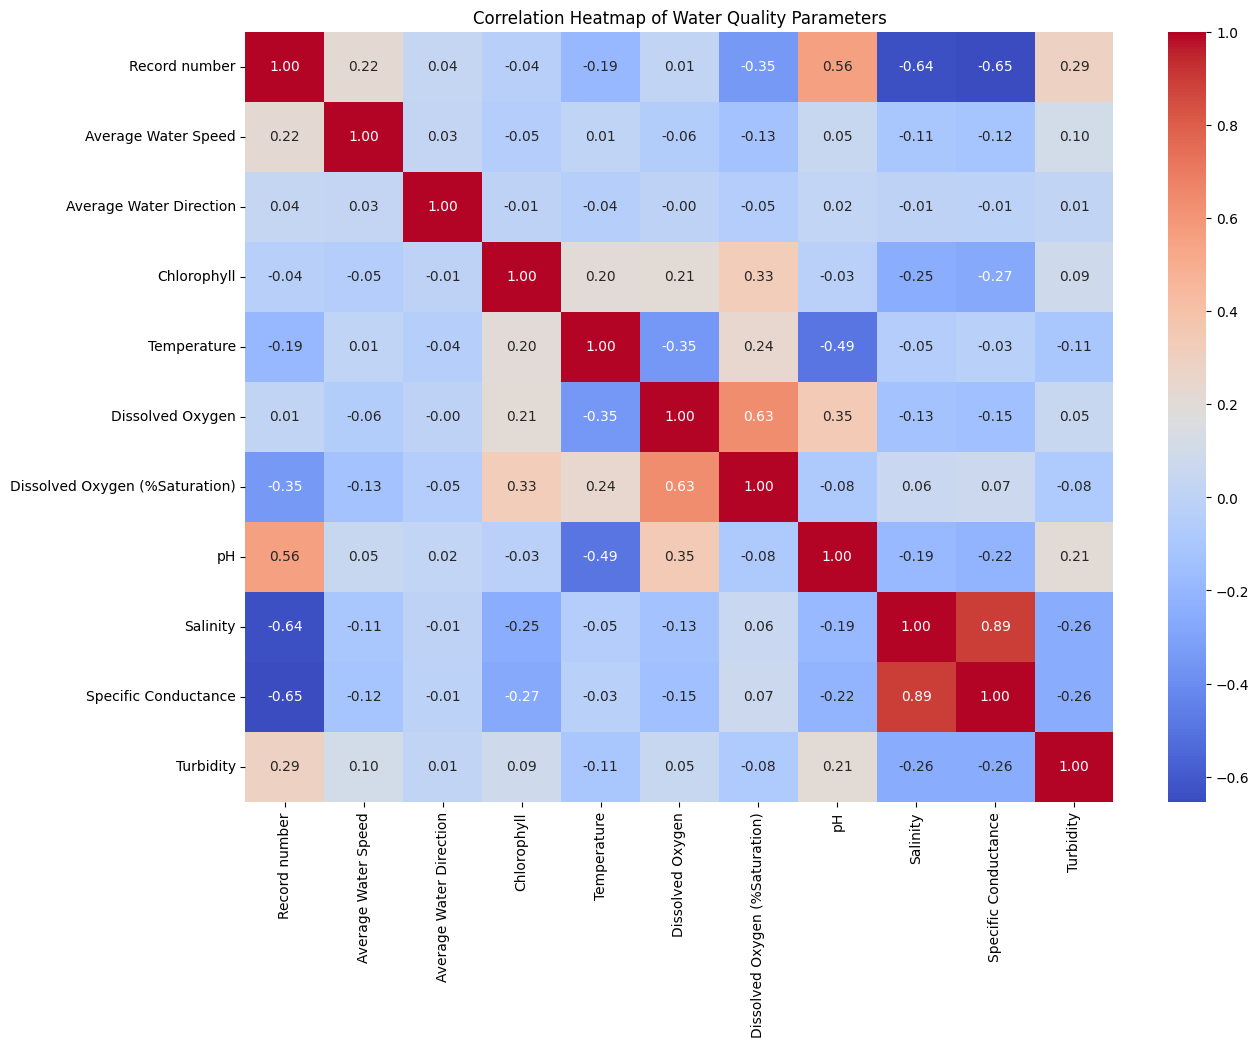

In [15]:
plt.figure(figsize=(14, 10))
correlation_matrix = naive_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()

In [16]:
for i in naive_data.columns:
  print(f'{i}---No. of unique values: {naive_data[i].nunique()} ')
print(f'No. of unique values in Timestamp: {naive_data.index.nunique()}')
print("Rows in data: ",data.shape[0])

Record number---No. of unique values: 30894 
Average Water Speed---No. of unique values: 20818 
Average Water Direction---No. of unique values: 29251 
Chlorophyll---No. of unique values: 6967 
Temperature---No. of unique values: 10787 
Dissolved Oxygen---No. of unique values: 3115 
Dissolved Oxygen (%Saturation)---No. of unique values: 16474 
pH---No. of unique values: 457 
Salinity---No. of unique values: 8565 
Specific Conductance---No. of unique values: 11457 
Turbidity---No. of unique values: 7733 
No. of unique values in Timestamp: 30614
Rows in data:  30894


The data has duplicate timestamp readings that might be the result of sensor errors or data recording issues.



In [17]:
duplicate_timestamps = naive_data.index[naive_data.index.duplicated()]
duplicate_timestamps_count = duplicate_timestamps.size
print("\nNumber of duplicate timestamps:", duplicate_timestamps_count)


Number of duplicate timestamps: 280


In [18]:
if duplicate_timestamps_count > 0:
    print("\nDetails of duplicate timestamps and their records:")
    duplicates = naive_data.loc[duplicate_timestamps]
    print(duplicates.head(10))  # Display the first 10 duplicates for brevity


Details of duplicate timestamps and their records:
                     Record number  Average Water Speed  \
Timestamp                                                 
2023-08-04 23:00:00           1468                4.834   
2023-08-04 23:00:00           1470                1.260   
2023-08-04 23:00:00           1472                3.397   
2023-08-04 23:00:00           1473                1.596   
2023-08-04 23:30:00           1469                2.544   
2023-08-04 23:30:00           1471                0.760   
2023-08-04 23:30:00           1474                6.622   
2023-08-04 23:00:00           1468                4.834   
2023-08-04 23:00:00           1470                1.260   
2023-08-04 23:00:00           1472                3.397   

                     Average Water Direction  Chlorophyll  Temperature  \
Timestamp                                                                
2023-08-04 23:00:00                   73.484        1.621       20.018   
2023-08-04 23:00:

In [19]:
water_data=data.copy()
#Using linear interpolation to fill in NaN values
water_data= water_data.interpolate(method='linear')

# Remove duplicate timestamps by averaging values
water_data = water_data.groupby(water_data.index).mean()

# Resample the data to a consistent frequency (e.g., hourly)
water_data_resampled = water_data.resample('H').mean().interpolate()

In [20]:
water_data_resampled.head()

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2023-08-04 23:00:00,1471.041667,3.040208,160.230375,1.821875,19.946208,7.438292,100.594792,8.1685,35.223792,53.273917,2.006917
2023-08-05 00:00:00,1475.500000,6.060000,72.561000,1.438000,19.813000,7.452500,100.569000,8.1625,35.272000,53.338000,2.014000
2023-08-05 01:00:00,1477.500000,6.610500,185.775500,1.291000,19.755500,7.450500,100.443000,8.1675,35.286500,53.357500,1.993500
2023-08-05 02:00:00,1479.500000,2.636000,245.397500,1.218000,19.711500,7.415000,99.891500,8.1695,35.291000,53.364000,1.853000
2023-08-05 03:00:00,1481.500000,1.306000,136.297500,1.231500,19.702000,7.201000,96.990500,8.1720,35.288500,53.360500,2.368500


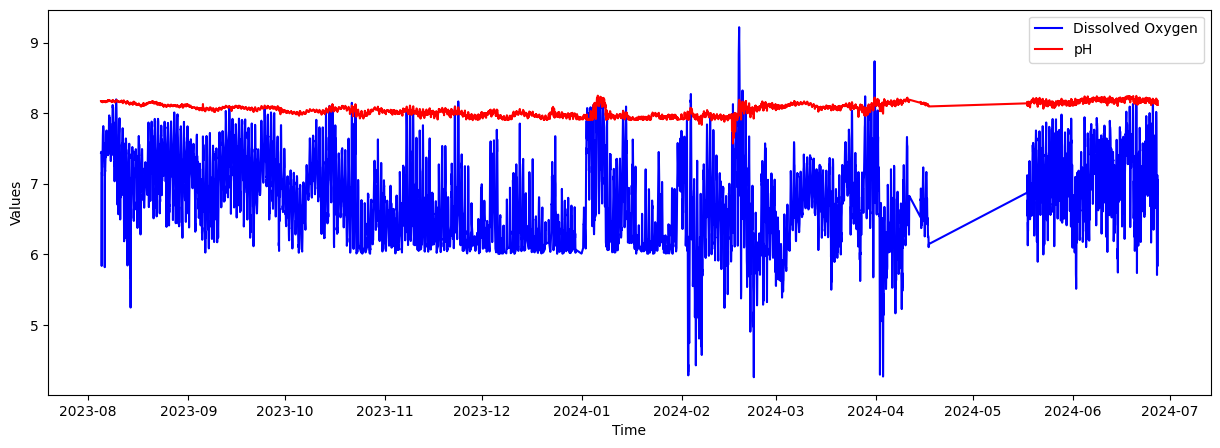

In [21]:
#Visualise the resampled data
plt.figure(figsize=(15,5))
plt.plot(water_data_resampled.index,water_data_resampled['Dissolved Oxygen'],color="blue",label="Dissolved Oxygen")
plt.plot(water_data_resampled.index,water_data_resampled['pH'],color="red",label="pH")
plt.legend()
plt.ylabel("Values")
plt.xlabel("Time")
plt.show()

In [22]:
dissolved_oxygen = water_data_resampled['Dissolved Oxygen']
pH = water_data_resampled['pH']

from statsmodels.tsa.seasonal import STL

stl_model = STL(dissolved_oxygen, period=25)
results = stl_model.fit()

# Access the trend, seasonal, and residual components
trend = results.trend
seasonal = results.seasonal
residual = results.resid

In [23]:
stl_model_ph = STL(pH, period=25)
results_ph = stl_model_ph.fit()

# Access the trend, seasonal, and residual components
trend_ph = results.trend
seasonal_ph = results.seasonal
residual_ph = results.resid

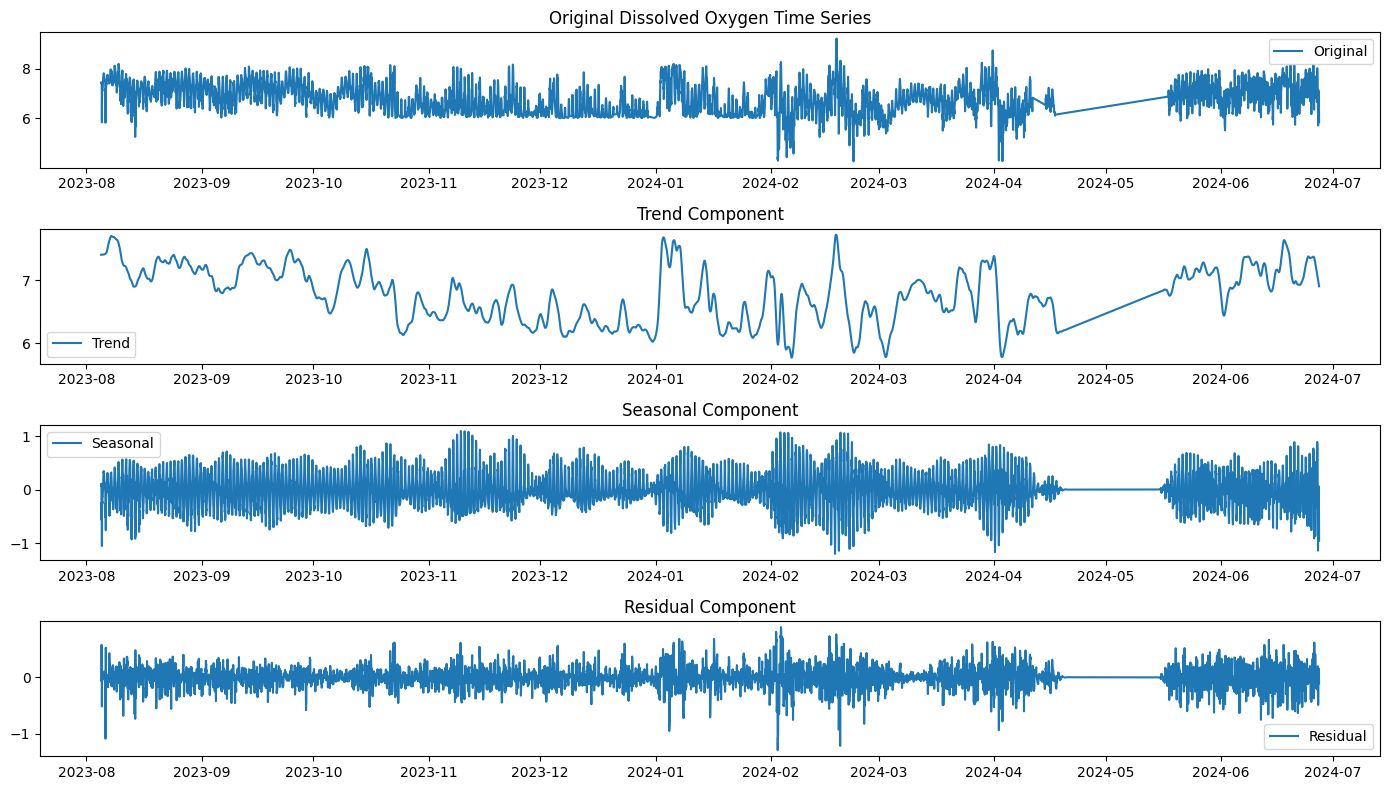

In [24]:
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(dissolved_oxygen, label='Original')
plt.legend(loc='best')
plt.title('Original Dissolved Oxygen Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

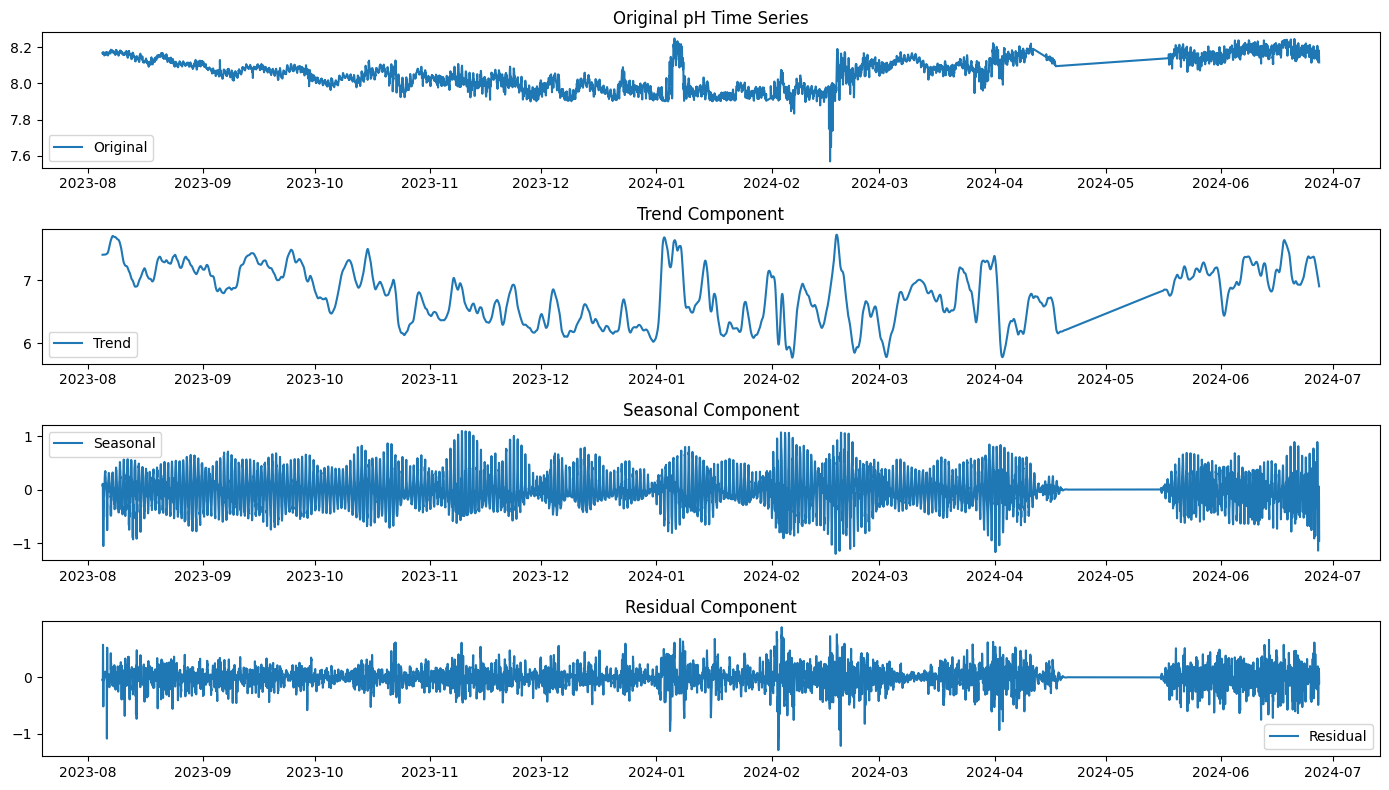

In [25]:
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(pH, label='Original')
plt.legend(loc='best')
plt.title('Original pH Time Series')

plt.subplot(412)
plt.plot(trend_ph, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal_ph, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual_ph, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

DICKEY-FUELLER TEST

In [26]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dissolved_oxygen, autolag='AIC')
dftest2 = adfuller(pH, autolag='AIC')

In [27]:
dftest[1],dftest2[1] ##data is stationary

(1.888602223561011e-09, 0.005468568152763129)

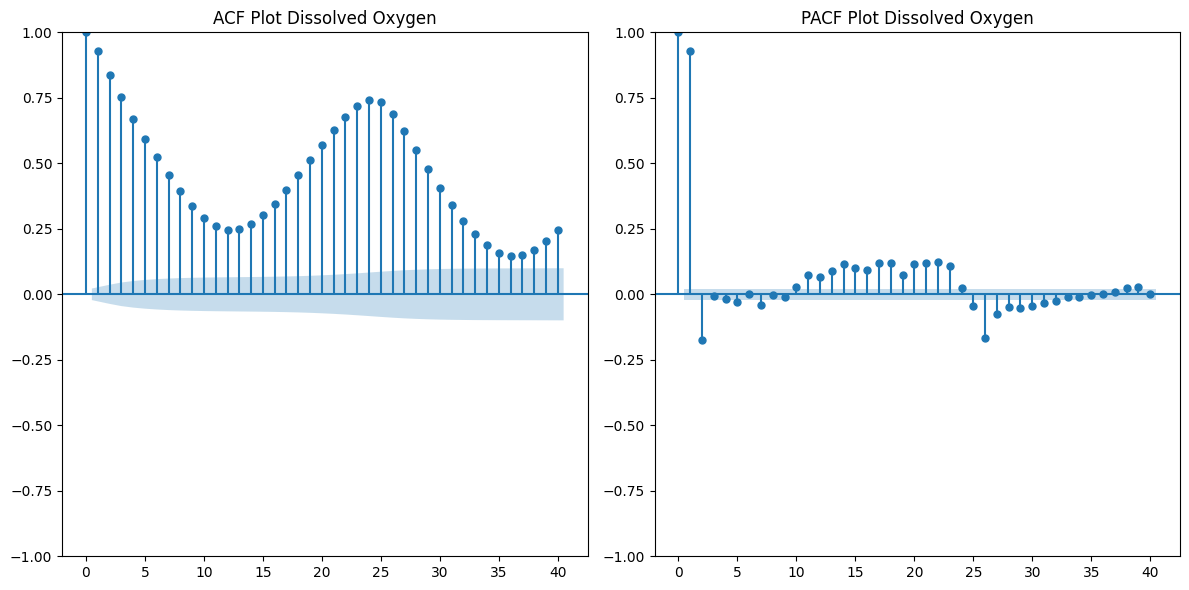

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Extract the series
series = water_data_resampled['Dissolved Oxygen']

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(series, lags=40, ax=plt.gca())
plt.title('ACF Plot Dissolved Oxygen')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(series, lags=40, ax=plt.gca())
plt.title('PACF Plot Dissolved Oxygen')

plt.tight_layout()
plt.show()


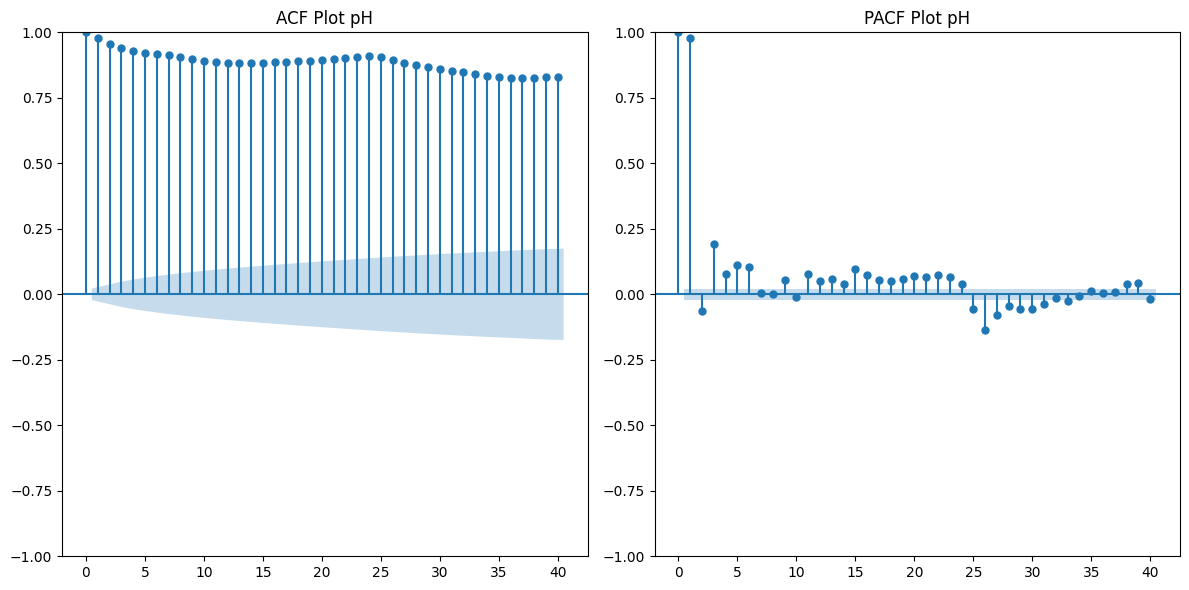

In [29]:
series = water_data_resampled['pH']

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(series, lags=40, ax=plt.gca())
plt.title('ACF Plot pH')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(series, lags=40, ax=plt.gca())
plt.title('PACF Plot pH')

plt.tight_layout()
plt.show()


In [41]:
split_index = int(len(water_data_resampled) * 0.90)
train = water_data_resampled.iloc[:split_index]
test = water_data_resampled.iloc[split_index:]

In [31]:
train.head()

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2023-08-04 23:00:00,1471.041667,3.040208,160.230375,1.821875,19.946208,7.438292,100.594792,8.1685,35.223792,53.273917,2.006917
2023-08-05 00:00:00,1475.500000,6.060000,72.561000,1.438000,19.813000,7.452500,100.569000,8.1625,35.272000,53.338000,2.014000
2023-08-05 01:00:00,1477.500000,6.610500,185.775500,1.291000,19.755500,7.450500,100.443000,8.1675,35.286500,53.357500,1.993500
2023-08-05 02:00:00,1479.500000,2.636000,245.397500,1.218000,19.711500,7.415000,99.891500,8.1695,35.291000,53.364000,1.853000
2023-08-05 03:00:00,1481.500000,1.306000,136.297500,1.231500,19.702000,7.201000,96.990500,8.1720,35.288500,53.360500,2.368500


SARIMAX

In [32]:
import itertools

p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [24]  # Assuming a daily seasonality with 24 hours

parameters = list(itertools.product(p, d, q, P, D, Q))

best_aic = float('inf')
best_params = None

for param in parameters:
    try:
        model = SARIMAX(train['Dissolved Oxygen'],
                        order=(param[0], param[1], param[2]),
                        seasonal_order=(param[3], param[4], param[5], s[0]),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print(f'Best SARIMA parameters: {best_params}, Best AIC : {best_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best SARIMA parameters: (1, 1, 1, 1, 1, 1), Best AIC : -3768.669086090277


In [33]:
import itertools

p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [24]  # Assuming a daily seasonality with 24 hours

parameters = list(itertools.product(p, d, q, P, D, Q))

best_aic = float('inf')
best_params = None

for param in parameters:
    try:
        model = SARIMAX(train['pH'],
                        order=(param[0], param[1], param[2]),
                        seasonal_order=(param[3], param[4], param[5], s[0]),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print(f'Best SARIMA parameters: {best_params}, Best AIC : {best_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best SARIMA parameters: (1, 1, 1, 1, 1, 1), Best AIC : -38113.687830927


In [35]:
model_DO = SARIMAX(train['Dissolved Oxygen'],

                   exog=train[[ 'Temperature','Chlorophyll']],

                   order=(1, 1, 1),

                   seasonal_order=(1, 1, 1, 24),

                   enforce_stationarity=False,

                   enforce_invertibility=False)
result_DO=model_DO.fit()
result_DO.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Temperature,-0.0774,0.008,-9.894,0.000,-0.093,-0.062
Chlorophyll,0.0842,0.002,43.715,0.000,0.080,0.088
ar.L1,0.8342,0.005,167.276,0.000,0.824,0.844
ma.L1,-0.9803,0.002,-442.602,0.000,-0.985,-0.976
ar.S.L24,0.0769,0.008,9.743,0.000,0.061,0.092
ma.S.L24,-0.9729,0.003,-287.909,0.000,-0.980,-0.966
sigma2,0.0307,0.000,124.210,0.000,0.030,0.031


In [50]:
model_ph=SARIMAX(train['pH'],order=(1,1,1),seasonal_order=(1,1,1,24), enforce_stationarity=False, enforce_invertibility=False)
result_ph=model_ph.fit()
result_ph.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7183,0.005,131.910,0.000,0.708,0.729
ma.L1,-0.9132,0.004,-233.114,0.000,-0.921,-0.906
ar.S.L24,0.0927,0.006,15.910,0.000,0.081,0.104
ma.S.L24,-1.0107,0.003,-370.614,0.000,-1.016,-1.005
sigma2,0.0002,1.39e-06,179.052,0.000,0.000,0.000


In [44]:
# Forecast future values using SARIMAX
forecast_steps = len(test)  # Number of steps to forecast
forecast_do_sarimax = result_DO.get_forecast(steps=forecast_steps,exog=test[[ 'Temperature','Chlorophyll']])
forecast_do_sarimax_ci = forecast_do_sarimax.conf_int()


In [51]:
# Forecast future values using SARIMAX
forecast_steps = len(test)  # Number of steps to forecast
forecast_ph_sarimax = result_ph.get_forecast(steps=forecast_steps)
forecast_ph_sarimax_ci = forecast_ph_sarimax.conf_int()


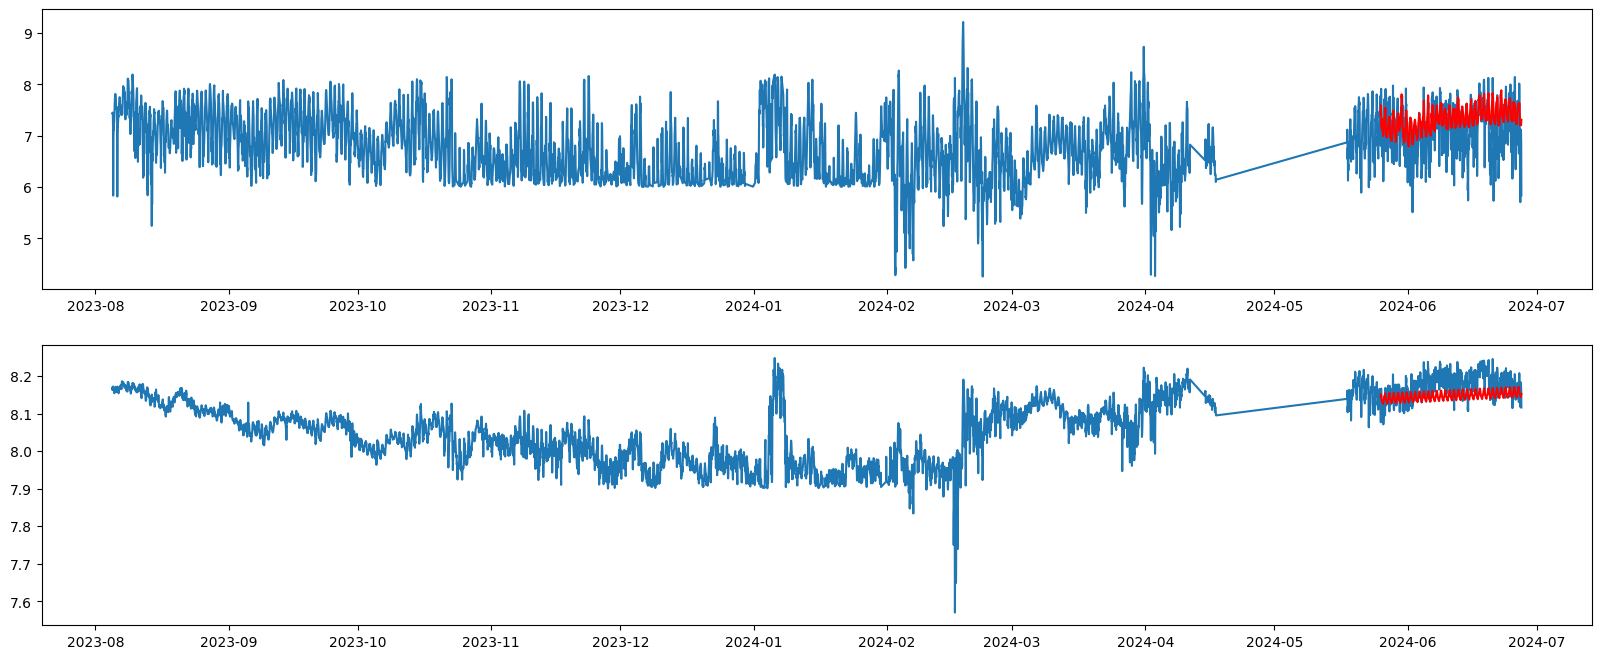

In [52]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
plt.plot(dissolved_oxygen.index, dissolved_oxygen, label='Observed')
plt.plot(forecast_do_sarimax.predicted_mean.index, forecast_do_sarimax.predicted_mean, color='r', label='SARIMAX Forecast')

plt.subplot(212)
plt.plot(pH.index, pH, label='Observed')
plt.plot(forecast_ph_sarimax.predicted_mean.index, forecast_ph_sarimax.predicted_mean, color='r', label='SARIMAX Forecast')

PROPHET


In [81]:
df_DO=train.reset_index()
df_DO = df_DO.rename(columns={'Timestamp': 'ds',
                        'Dissolved Oxygen': 'y'})

model_do_prophet = Prophet(interval_width=0.95)
model_do_prophet.fit(df_DO)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplrcl5fw_/b9t9b5lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplrcl5fw_/mx50f115.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43667', 'data', 'file=/tmp/tmplrcl5fw_/b9t9b5lg.json', 'init=/tmp/tmplrcl5fw_/mx50f115.json', 'output', 'file=/tmp/tmplrcl5fw_/prophet_model7lh5ezmh/prophet_model-20240902174316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [82]:
df_ph=train.reset_index()
df_ph = df_ph.rename(columns={'Timestamp': 'ds',
                        'pH': 'y'})

model_pH_prophet = Prophet()
model_pH_prophet.fit(df_ph)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplrcl5fw_/9pdxrgke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplrcl5fw_/pad9eux6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33185', 'data', 'file=/tmp/tmplrcl5fw_/9pdxrgke.json', 'init=/tmp/tmplrcl5fw_/pad9eux6.json', 'output', 'file=/tmp/tmplrcl5fw_/prophet_modelsegu4fn9/prophet_model-20240902174419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:44:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:44:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
future_df = test.reset_index()
future_df=future_df.rename(columns={'Timestamp': 'ds'})
future_df.head()

,ds,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
0,2024-05-25 16:00:00,27622.5,17.129333,235.237167,2.711667,21.051000,7.078000,93.720000,8.096500,28.187000,43.649167,8.733833
1,2024-05-25 17:00:00,27628.5,10.695167,139.977333,1.991333,21.073667,6.804833,90.198000,8.076833,28.289500,43.792167,5.871667
2,2024-05-25 18:00:00,27634.5,19.153167,271.697500,4.683833,20.974833,7.860000,103.980833,8.153833,28.275667,43.771667,8.188167
3,2024-05-25 19:00:00,27640.5,14.755500,180.452000,4.522667,20.990833,7.916500,104.844667,8.166500,28.412333,43.961667,9.099167
4,2024-05-25 20:00:00,27646.5,17.635833,139.703500,4.914167,21.143500,7.690833,102.267500,8.153167,28.614000,44.244333,9.590500


In [84]:
forecast_do_prophet = model_do_prophet.predict(future_df)
forecast_pH_prophet = model_pH_prophet.predict(future_df)

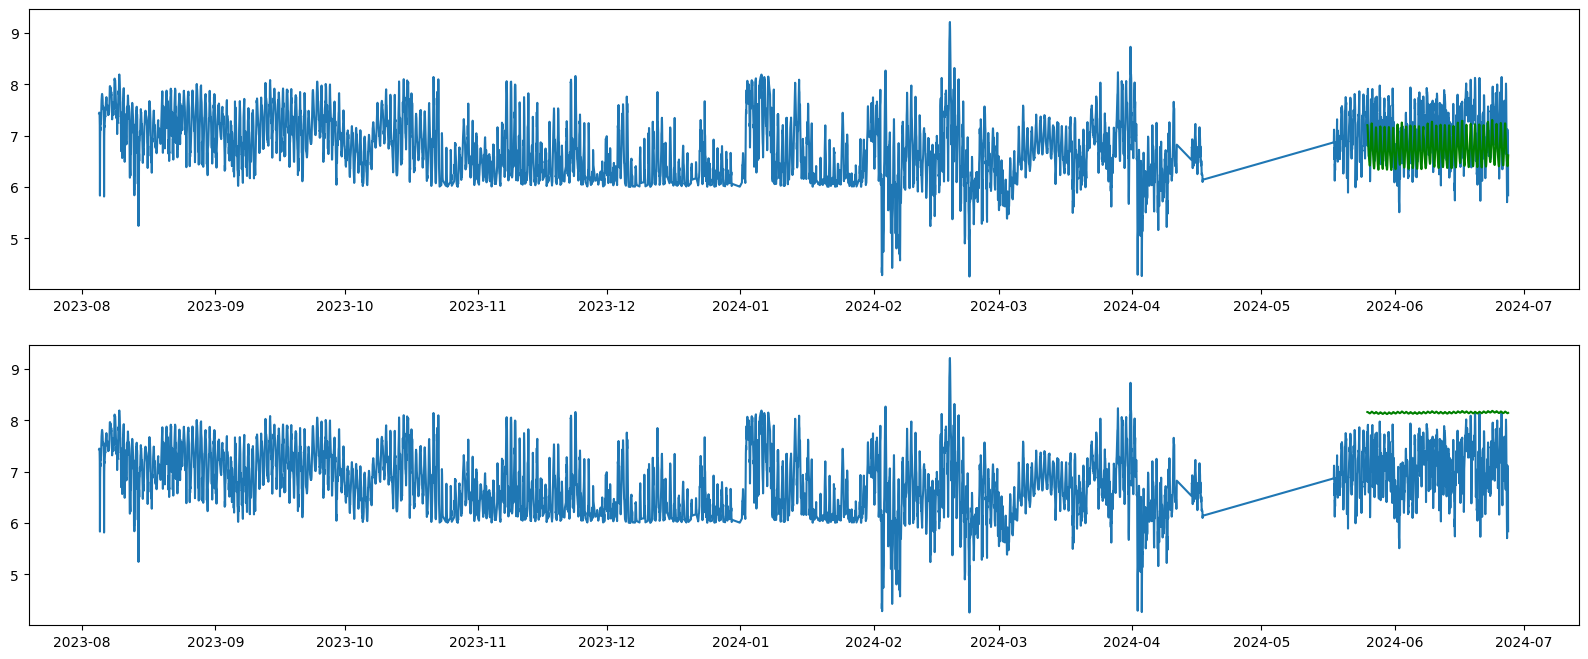

In [89]:
plt.figure(figsize=(20, 8))

plt.subplot(211)

plt.plot(dissolved_oxygen.index, dissolved_oxygen, label='Observed')
plt.plot(forecast_do_prophet['ds'], forecast_do_prophet['yhat'], color='g', label='Prophet Forecast')

plt.subplot(212)

plt.plot(dissolved_oxygen.index, dissolved_oxygen, label='Observed')
plt.plot(forecast_pH_prophet['ds'], forecast_pH_prophet['yhat'], color='g', label='Prophet Forecast')

In [91]:
import numpy as np
def calculate_accuracy(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse
# Evaluate the models
mae_do, rmse_do = calculate_accuracy(test['Dissolved Oxygen'], forecast_do_sarimax.predicted_mean)
mae_ph, rmse_ph = calculate_accuracy(test['pH'], forecast_ph_sarimax.predicted_mean)

mae_do1, rmse_do1 = calculate_accuracy(test['Dissolved Oxygen'], forecast_do_prophet['yhat'])
mae_ph1, rmse_ph1 = calculate_accuracy(test['pH'], forecast_pH_prophet['yhat'])

print("SARIMAX")
print("Dissolved Oxygen:")
print("MAE:", mae_do)
print("RMSE:", rmse_do)

print("\npH:")
print("MAE:", mae_ph)
print("RMSE:", rmse_ph)

print("\nPROPHET")
print("Dissolved Oxygen:")
print("MAE:", mae_do1)
print("RMSE:", rmse_do1)

print("\npH:")
print("MAE:", mae_ph1)
print("RMSE:", rmse_ph1)

SARIMAX
Dissolved Oxygen:
MAE: 0.34051813045727025
RMSE: 0.44782157032840764

pH:
MAE: 0.03568801328013634
RMSE: 0.04227563193896983

PROPHET
Dissolved Oxygen:
MAE: 0.4808338737048274
RMSE: 0.5650160733290543

pH:
MAE: 0.032551026258480546
RMSE: 0.039136202097762085
